In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/python/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR

from helper import make_datacard, make_datacard_2sig, weight_calc

import CMS_lumi, tdrstyle
a = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
import math
def dPhi(x):
    while np.count_nonzero(x>math.pi):
        x[x>math.pi] = x[x>math.pi]-2*math.pi
    while np.count_nonzero(x<-math.pi):
        x[x<-math.pi] = x[x<-math.pi]+2*math.pi
    return x

# Load ntuples

In [3]:
fpath =OrderedDict()
tree = OrderedDict()


start_t = time.time()



isData = 0

ntupler_version = 'V1p17/'

analyzer_version = "/v1/v135/" #new acceptance definition



decay = 'bbbb'
mass = ['15', '40','55']
# mass = ['40','55']
OLD_CTAU  = ['100','1000','10000','100000']
# ctaus = ['10']
for ct in OLD_CTAU:
    for m in mass:
#         mc_path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all/'+analyzer_version+'/normalized/'
#         mc_path = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all/'+analyzer_version+'/normalized/'

        mc_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all'+analyzer_version+'/normalized/'


        fpath['m'+m+'ctau'+ct] = mc_path + 'ggH_HToSSTo'+decay+'_MH-125_MS-'+str(m)+'_ctau-'+ct+'_137000pb_weighted.root'

for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['MuonSystem']
   



m15ctau100 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135//normalized/ggH_HToSSTobbbb_MH-125_MS-15_ctau-100_137000pb_weighted.root
m40ctau100 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135//normalized/ggH_HToSSTobbbb_MH-125_MS-40_ctau-100_137000pb_weighted.root
m55ctau100 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135//normalized/ggH_HToSSTobbbb_MH-125_MS-55_ctau-100_137000pb_weighted.root
m15ctau1000 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135//normalized/ggH_HToSSTobbbb_MH-125_MS-15_ctau-1000_137000pb_weighted.root
m40ctau1000 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135//normalized/ggH_HToSSTobbbb_MH-125_MS-40_ctau-1000_137000pb_weighted.root
m55ctau1000 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_all/v1/v135/

In [4]:

intime = True
DPHI_CUT = 1
weight = {}

weight0 = {}

weight1 = {}

weight2 = {}

weight_event = {}
weight_ctau = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
cscRechitClusterJetVetoPt = {}
cscRechitCluster_match_dr = {}
cscRechitCluster2_match_highEta_0p4 = {}
gLLP_csc = {}
cscClusterSize = {}
cscClusterTime = {}
nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}
cscRechitClusterTimeDiff = {}
cscRechitCluster_match_gLLP = {}


cscRechitClusterJetVetoE = {}

cscRechitClusterPhi = {}
cscRechitClusterEta = {}

jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
sel_ev0 = {}
sel_ev1 = {}
sel_ev2 = {}
cond0 = {}
cond1 = {}
cond2 = {}
gLLP_deltaR0 = {}
gLLP_deltaR1 = {}
gLLP_deltaR2 = {}

cscRechitClusterEta = {}
dtClusterSize = {}
cluster_index = ''
nRings = {}
dtRechitClusterEta = {}
dtRechitClusterPhi = {}
dtRechitCluster_match_gLLP_index = {}
cscRechitCluster_match_gLLP_index = {}
metPhi = {}
cond = {}
cond_match = {}
cscRechitClusterTimeTotal = {}
deltaRCluster = {}
# 0: 2 CSC; 1: 2DT; 2: csc+dt
category = 2

for k in tree.keys():
    T = tree[k]
        
########### SELECTION: CLUSTERS ############
    sel_csccluster = np.logical_and(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_minDeltaR')<0.4, T.array('cscRechitCluster' + cluster_index + '_match_gLLP'))

    sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeTotal') < 12.5, \
                                                                             T.array('cscRechitCluster' + cluster_index + 'TimeTotal') > -5))
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpread')<20)
#     ## stricter/more realistic
#     sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')<20)
#     sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<50)
# #     sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta'))<2)
#     sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Size')>=100)
#     sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<0.75)



    
    sel_dtcluster = np.logical_and(np.abs(T.array('dtRechitCluster_match_gLLP_minDeltaR'))<0.4, np.abs(T.array('dtRechitCluster_match_gLLP')))
    sel_dtcluster = np.logical_and(sel_dtcluster, T.array('dtRechitCluster_match_gLLP_dt'))
#     sel_dtcluster = np.logical_and(sel_dtcluster, T.array('dtRechitClusterJetVetoPt') < 10)
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1)
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterSize')) >= 100)
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitCluster_match_RPChits_dPhi0p5')) > 0)
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterJetVetoPt')) < 100)



########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 50, np.abs(T.array('jetEta')) < 2.4 )

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev[k] = T.array('METNoMuTrigger')


    sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == 0)
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('nLeptons') == 0)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    
    sel_ev0[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum()== 2)
    index = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_index')[sel_csccluster][sel_ev0[k]][:,:2]
    cond0[k] = np.logical_not(index[:,0]==index[:,1])
    weight0[k] = (T.array('weight')*T.array('pileupWeight'))[sel_ev0[k]][cond0[k]]
    gLLP_deltaR0[k] = T.array('gLLP_deltaR')[sel_ev0[k]][cond0[k]]
    
    sel_ev1[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum()== 2)
    index = T.array('dtRechitCluster' + cluster_index + '_match_gLLP_index')[sel_dtcluster][sel_ev1[k]][:,:2]
    cond1[k] = np.logical_not(index[:,0]==index[:,1])
    weight1[k] = (T.array('weight')*T.array('pileupWeight'))[sel_ev1[k]][cond1[k]]
    gLLP_deltaR1[k] = T.array('gLLP_deltaR')[sel_ev1[k]][cond1[k]]

#     sel_ev1[k]  = np.logical_and(sel_ev[k],np.sum(T.array('gLLP_dt'),axis=1)==2)
#     weight1[k] = (T.array('weight')*T.array('pileupWeight'))[sel_ev1[k]]
    
    sel_ev2[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum()== 1)
    sel_ev2[k]  = np.logical_and(sel_ev2[k],sel_dtcluster.sum()== 1)
    dt_index = T.array('dtRechitCluster' + cluster_index + '_match_gLLP_index')[sel_dtcluster][sel_ev2[k]][:,0]
    csc_index = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_index')[sel_csccluster][sel_ev2[k]][:,0]
    cond2[k] = np.logical_not(dt_index == csc_index)
    weight2[k] = (T.array('weight')*T.array('pileupWeight'))[sel_ev2[k]][cond2[k]]
    gLLP_deltaR2[k] = T.array('gLLP_deltaR')[sel_ev2[k]][cond2[k]]


########### BRANCHES ############

   ##### event variables ##### 
    

#     cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][:,:2]
#     cscRechitCluster_match_gLLP_index[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_index')[sel_rechitcluster][sel_ev[k]][:,:2]
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev2[k]][:,0]

    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev2[k]][:,0]
    dtRechitClusterEta[k] = T.array('dtRechitCluster' + cluster_index + 'Eta')[sel_dtcluster][sel_ev2[k]][:,0]

    dtRechitClusterPhi[k] = T.array('dtRechitCluster' + cluster_index + 'Phi')[sel_dtcluster][sel_ev2[k]][:,0]
    deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])

    

#     cscRechitClusterTimeTotal[k] = T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_rechitcluster][sel_ev[k]][:,:2]
#     cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev[k]][:,:2]
    
#     nRings[k] = (T.array('nDtRings')+T.array('nCscRings'))[sel_ev[k]]

#     weight[k] = T.array('weight')[sel_ev[k]]
#     metPhi[k] = T.array('metPhi')[sel_ev[k]]

    
  

# signal yield table

In [5]:
ctaus = [ '100', '500', '1000','3000','5000','10000','100000' ]
OLD_CTAU = [ 100, 1000,10000,100000]


BR = 0.01
N_RECHIT_CUT = 130
DPHI_CUT = 0.75
corrections = 0.8953452999999999
category = 0
# DPHI_CUT = 0.6      
# var = jetMet_dPhiMin30
for N_RECHIT_CUT in np.arange(60,220,10):
    if not N_RECHIT_CUT==130:continue
    total_sig = 0
    for m in mass:
#         if not m == 55:continue
        signal_rate = []
        unc_rate = []
        signal_unc = []
        for ct in ctaus:   
            
            
            ####################################
            ctf = int(ct)
            ct_list = 10**int(math.log10(ctf))
            if ctf < OLD_CTAU[0]: ct_list = [OLD_CTAU[0]]
            elif ctf>OLD_CTAU[-1]: ct_list = [OLD_CTAU[-1]]
            elif ct_list == int(ct): ct_list = [int(ct)]
            else:ct_list = [ct_list,ct_list*10]
            signal = 0
            for i, ct0 in enumerate(ct_list):
                k = 'm'+m+'ctau'+str(ct0)
                T = tree[k]
                if np.count_nonzero(sel_ev[k])==0:continue
                gLLP_ctau = T.array('gLLP_ctau')[sel_ev1[k]][cond1[k]]
                if category == 0:gLLP_ctau = T.array('gLLP_ctau')[sel_ev0[k]][cond0[k]]
                elif category == 1:gLLP_ctau = T.array('gLLP_ctau')[sel_ev1[k]][cond1[k]]
                else:gLLP_ctau = T.array('gLLP_ctau')[sel_ev2[k]][cond2[k]]
                    
                weight_ctau = weight_calc(gLLP_ctau, int(ct)/10, int(ct0)/10) # convert everything to cm
                if category == 0:gLLP_ctau = np.sum(T.array('gLLP_ctau'), axis = 1)[sel_ev0[k]][cond0[k]]
                elif category == 1:gLLP_ctau = np.sum(T.array('gLLP_ctau'), axis = 1)[sel_ev1[k]][cond1[k]]
                else:gLLP_ctau = np.sum(T.array('gLLP_ctau'), axis = 1)[sel_ev2[k]][cond2[k]]
                if len(ct_list) == 1:weight_cond = gLLP_ctau >= 0
                else:
                    if i == 0 : weight_cond = gLLP_ctau<int(ct_list[0]/2)
                    else: weight_cond = gLLP_ctau>=int(ct_list[0]/2)
                if category == 0: w = (weight0[k]*weight_ctau)[weight_cond] 
                elif category == 1:w = (weight1[k]*weight_ctau)[weight_cond] 
                else:w = (weight2[k]*weight_ctau)[weight_cond] 
    #             signal = np.sum(weight2[k][deltaRCluster[k][cond[k]]>0.4])
                signal += np.sum(w)

            signal_rate.append(signal)
        signal_rate = np.array(signal_rate)
        print(m, '\t', '\t'.join(map(str, [round(num,2) for num in signal_rate*BR])))
        total_sig += np.sum(signal_rate)


15 	 1.17	6.5	4.4	1.1	0.48	0.16	0.0
40 	 0.07	3.07	6.8	4.78	2.66	0.86	0.02
55 	 0.0	0.35	1.2	2.26	1.6	0.64	0.02


In [ ]:
2csc
15 	 0.45	3.07	1.8	0.37	0.15	0.01	0.0
40 	 0.03	1.76	4.13	2.77	1.5	0.47	0.01
55 	 0.0	0.1	0.6	1.17	0.79	0.24	0.01


2dt
15 	 0.04	7.74	8.25	3.01	1.46	0.43	0.0
15 	 0.18	12.27	12.88	4.79	2.33	0.64	0.0


55 	 0.0	0.23	1.66	3.73	2.83	1.45	0.05
55 	 0.0	1.57	10.26	21.78	15.61	6.83	0.08


# Plots

In [ ]:
ctaus = ['100','1000','10000','100000']

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


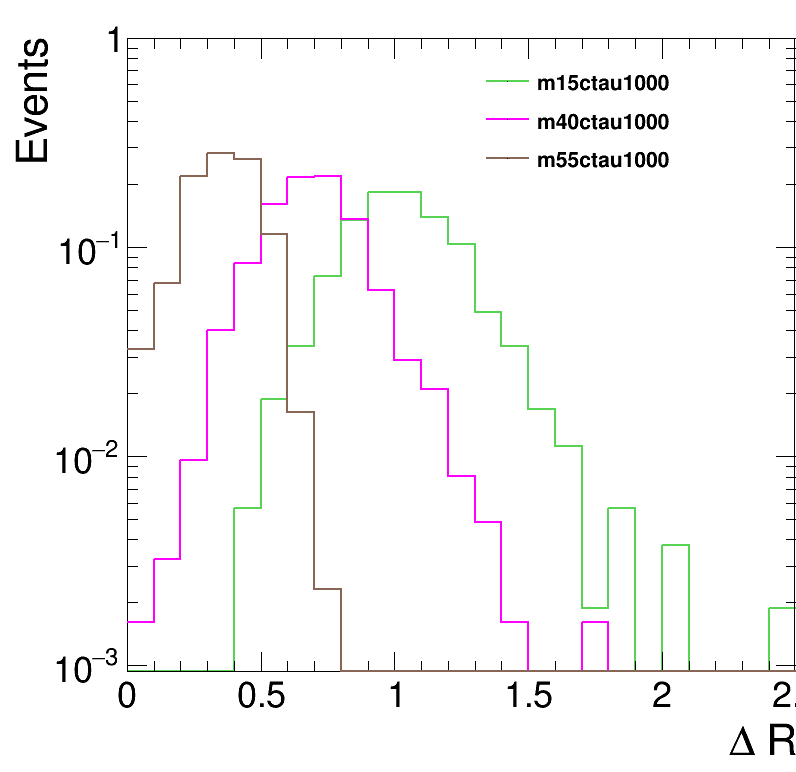

In [13]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


leg = rt.TLegend(0.6,0.77,0.90,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)

h = {}
rt.gStyle.SetOptFit(1011)
for i, k in enumerate(tree.keys()):
    if not('ctau1000' in k and not '10000' in k):continue
#     cond = np.logical_not(cscRechitCluster_match_gLLP_index[k][:,0]==cscRechitCluster_match_gLLP_index[k][:,1])
#     h[k] = create_TH1D(nRings[k],axis_title = ['abs(#phi_{csc}-#phi_{dt})','Events'], binning=[10,0,10], weights = weight[k])

#     h[k] = create_TH1D(dPhi((cscRechitClusterPhi[k][:,0]-cscRechitClusterPhi[k][:,1]))[cond],axis_title = ['abs(#phi_{csc}-#phi_{dt})','Events'], binning=[100,-5,5], weights = weight[k][cond])

#     h[k] = create_TH1D(np.abs((cscRechitClusterEta[k][:,0])),axis_title = ['abs(#eta_{csc1}-#eta_{csc2})','Events'], binning=[25,0,2.5])
    h[k] = create_TH1D(np.abs((gLLP_deltaR2[k])),axis_title = ['#Delta R','Events'], binning=[25,0,2.5])
#     h[k+'1'] = create_TH1D(np.abs((gLLP_deltaR1[k])),axis_title = ['#Delta R','Events'], binning=[25,0,2.5])
#     h[k+'2'] = create_TH1D(np.abs((gLLP_deltaR2[k])),axis_title = ['#Delta R','Events'], binning=[25,0,2.5])
#     h[k] = create_TH1D(np.abs((cscRechitClusterEta[k][:,0]-cscRechitClusterEta[k][:,1])),axis_title = ['abs(#eta_{csc1}-#eta_{csc2})','Events'], binning=[100,0,5])
#     h[k] = create_TH1D(np.abs((cscRechitClusterTimeTotal[k][:,0]-cscRechitClusterTimeTotal[k][:,1]))[cond],axis_title = ['abs(time1-time2)','Events'], binning=[100,0,50], weights = weight[k][cond])
    h[k].SetMaximum(h[k].Integral())
    h[k].SetLineColor(std_color_list[i])
#     h[k+'2'].SetLineColor(std_color_list[i])
#     h[k+'0'].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k],k)
    h[k].DrawNormalized('same hist')


        

c.SetRightMargin(0)
c.SetLogy()
leg.Draw()
c.Draw()



In [35]:
cscRechitClusterTimeTotal[k]

<JaggedArray [[4.514666 37.913155] [6.994511 26.44305] [65.37091 25.097355] ... [2.4693701 -25.011976] [0.85557914 0.20072345] [4.357872 25.69513]] at 0x7f6378b97eb8>

# 2d plots



m15ctau1000
0.00538182258605957


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


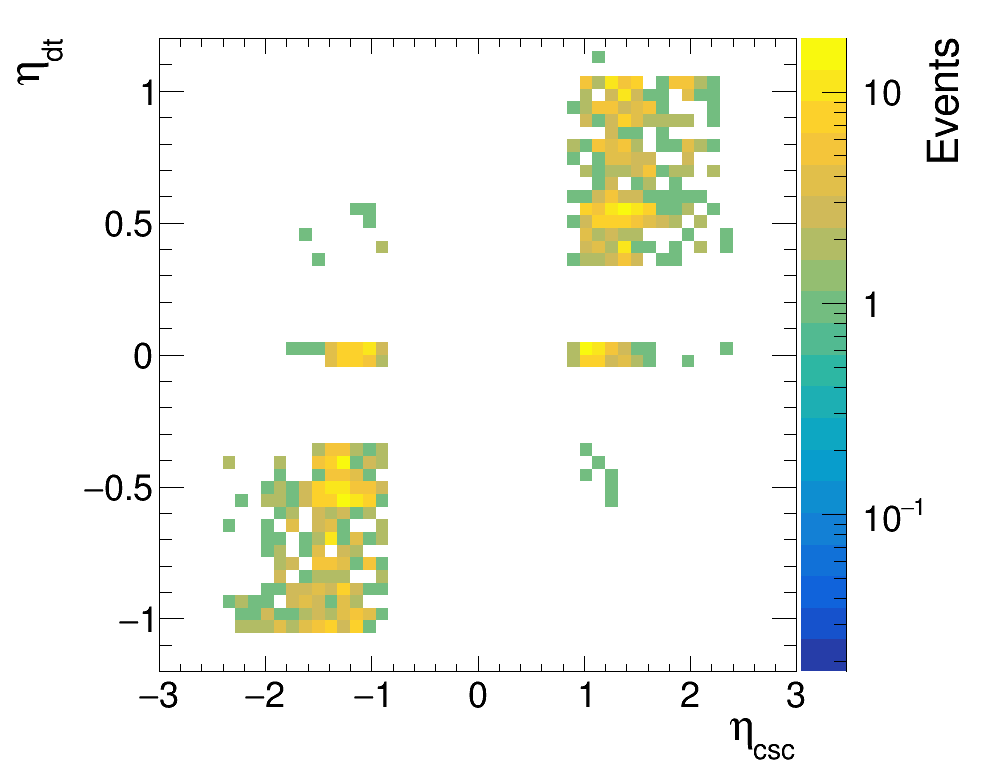

In [54]:

start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
for k in tree.keys():
    cond = np.logical_not(dtRechitCluster_match_gLLP_index[k]==cscRechitCluster_match_gLLP_index[k])
    if not k == 'm15ctau1000':continue
    print(k)
#     h = create_TH2D(np.column_stack(( var1[cond],var2[cond])),axis_title = ['csc rechits','dt rechits','Events'], binning=[25,30,100,25,30,100])
    h[k] = create_TH2D(np.column_stack(( cscRechitClusterEta[k][cond],dtRechitClusterEta[k][cond])),axis_title = ['#eta_{csc}','#eta_{dt}','Events'], binning=[50,-3,3,50,-1.2,1.2])

#     h = create_TH2D(np.column_stack(( cscRechitClusterPhi[k][cond],dtRechitClusterPhi[k][cond])),axis_title = ['csc phi','dt phi','Events'], binning=[50,-3.5,3.5,50,-3.5,3.5])
#     h[k] = create_TH2D(np.column_stack(( dPhi((cscRechitClusterPhi[k]-metPhi[k])[cond]), dPhi((dtRechitClusterPhi[k]-metPhi[k])[cond]))),\
#                     axis_title = ['dphi(csc cluster, met)','dphi(dt cluster, met)','Events'], binning=[25,-3,3,25,-3,3])




    h[k].Draw('colz')
c.SetRightMargin(0.2)
c.SetLogz()
c.Draw()



print(time.time()-start_t)